
<h1>Задание 1</h1>

У вас есть небольшой искусственный датасет: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset/data   

# Гипотезы
1 Женщины ставят оценки выше, чем мужчины 
2 

<h2>Задание 1.1</h2>

На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

In [281]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns


In [282]:
data = pd.read_csv('/Users/dmitrykomarov/Desktop/Python/wb/wb_eda/shopping_trends_updated.csv')
df = data.copy()
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [284]:
df.describe().applymap(lambda x: f"{x:2f}")[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].T

/var/folders/dk/n71lg2t15112j9nnvkz6cznm0000gn/T/ipykernel_99324/464007081.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.describe().applymap(lambda x: f"{x:2f}")[['Age', 'Purchase Amount (USD)', 'Review Rating', 'Previous Purchases']].T


,count,mean,std,min,25%,50%,75%,max
Age,3900.000000,44.068462,15.207589,18.000000,31.000000,44.000000,57.000000,70.000000
Purchase Amount (USD),3900.000000,59.764359,23.685392,20.000000,39.000000,60.000000,81.000000,100.000000
Review Rating,3900.000000,3.749949,0.716223,2.500000,3.100000,3.700000,4.400000,5.000000
Previous Purchases,3900.000000,25.351538,14.447125,1.000000,13.000000,25.000000,38.000000,50.000000


In [285]:
result = df.describe(include=["object", "category"])[['Gender', 'Item Purchased', 'Category', 
                                                      'Location', 'Size', 'Color', 'Season', 
                                                      'Subscription Status', 'Shipping Type', 
                                                      'Discount Applied', 'Promo Code Used', 
                                                      'Payment Method', 'Frequency of Purchases']].T
print(result)

                       count unique             top  freq
Gender                  3900      2            Male  2652
Item Purchased          3900     25          Blouse   171
Category                3900      4        Clothing  1737
Location                3900     50         Montana    96
Size                    3900      4               M  1755
Color                   3900     25           Olive   177
Season                  3900      4          Spring   999
Subscription Status     3900      2              No  2847
Shipping Type           3900      6   Free Shipping   675
Discount Applied        3900      2              No  2223
Promo Code Used         3900      2              No  2223
Payment Method          3900      6          PayPal   677
Frequency of Purchases  3900      7  Every 3 Months   584


In [286]:
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

<h2>Задание 1.2</h2>

Помимо гипотез:
* найдите самый популярный товар
* постройте распределение покупателей по полу
* определите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары
* определите, есть ли зависимость между цветом одежды и сезоном.
* посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.
* найдите самую популярную букву в названии одежды. 



# Топ-3 популярных товаров


In [287]:
top_3_item = df['Item Purchased'].value_counts().reset_index().nlargest(3, 'count')
top_3_item

,Item Purchased,count
0,Blouse,171
1,Jewelry,171
2,Pants,171


# Постройте распределение покупателей по полу



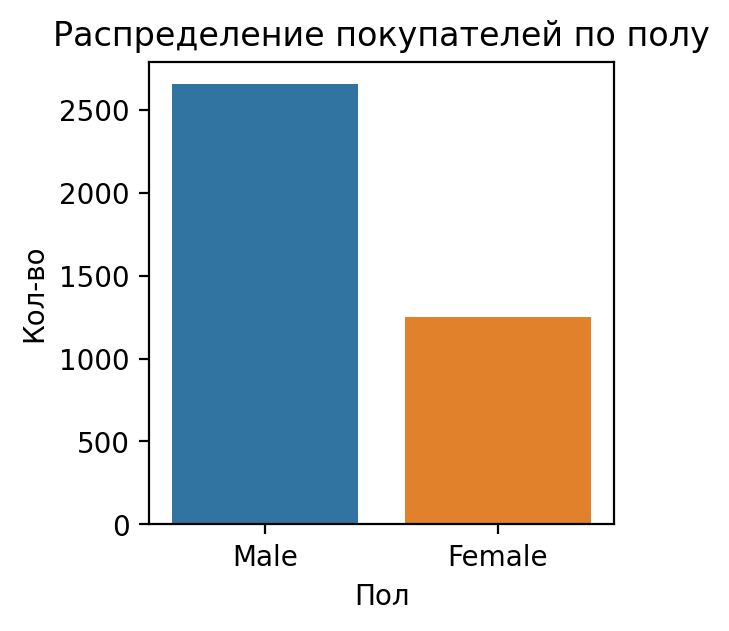

In [288]:
plt.figure(figsize=(3, 3), dpi=200)
sns.countplot(data=df, x='Gender')

plt.xlabel('Пол')
plt.ylabel('Кол-во')

plt.title('Распределение покупателей по полу');

# Oпределите, какой пол (и отдельно возраст) покупает больше всего, чаще всего, самые дорогие товары

In [289]:
df['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [290]:
# Находим пол, который покупает больше всего
most_purchases_gender = df.groupby("Gender")["Item Purchased"].count().idxmax()

# Находим возраст, который покупает больше всего
most_purchases_age = df.groupby("Age")["Item Purchased"].count().idxmax()

In [291]:
# Находим пол, который покупает самые дорогие товары
most_expensive_gender = df.groupby("Gender")["Purchase Amount (USD)"].sum().idxmax()

# Находим возраст, который покупает самые дорогие товары
most_expensive_age = df.groupby("Age")["Purchase Amount (USD)"].sum().idxmax()

In [292]:
# Находим возраст, который покупает чаще всего
most_frequent = df[df['Frequency of Purchases'] == 'Bi-Weekly']

most_frequent_age = most_frequent.groupby('Age')['Frequency of Purchases'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)

most_frequent_age = most_frequent_age.iloc[0]['Age']

In [ ]:
# Находим возраст пол, который покупает чаще всего
most_frequent_gender = most_frequent.groupby('Gender')['Frequency of Purchases'].value_counts().reset_index(name='count').sort_values(by='count', ascending=False)


most_frequent_gender_result = most_frequent_gender.iloc[0]['Gender']

In [ ]:

print("Пол с наибольшими покупками:", most_purchases_gender)
print("Возраст с наибольшими покупками:", most_purchases_age)


print("Пол с самыми дорогими покупками:", most_expensive_gender)
print("Возраст с самыми дорогими покупками:", most_expensive_age)


print("Возраст, который чаще всего покупает:", most_frequent_age)
print("Пол, который чаще всего покупает:", most_frequent_gender_result)


Пол с наибольшими покупками: Male
Возраст с наибольшими покупками: 69
Пол с самыми дорогими покупками: Male
Возраст с самыми дорогими покупками: 49
Возраст, который чаще всего покупает: 29
Пол, который чаще всего покупает: Male


# Определите, есть ли зависимость между цветом одежды и сезоном.


In [ ]:
from scipy.stats import chi2_contingency

# Создаем таблицу сопряженности
color_season_table = pd.crosstab(df["Color"], df["Season"])

# Проводим тест хи-квадрат
chi2, p, dof, expected = chi2_contingency(color_season_table)

if p < 0.05:
    print("Зависимость между цветом одежды и сезоном есть (p-value = {:.5f})".format(p))
else:
    print("Зависимости между цветом одежды и сезоном нет (p-value = {:.5f})".format(p))

Зависимости между цветом одежды и сезоном нет (p-value = 0.71855)


# Посчитайте наш сезонный mau (уникальных пользователей за сезон) и его динамику.

In [ ]:
# Сезонный MAU
seasonal_mau = df.groupby("Season")["Customer ID"].nunique()

# Динамика MAU
seasonal_mau_diff = seasonal_mau.pct_change() * 100

print("Сезонный MAU:\n", seasonal_mau)
print("\nДинамика MAU:\n", seasonal_mau_diff)

Сезонный MAU:
 Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64

Динамика MAU:
 Season
Fall           NaN
Spring    2.461538
Summer   -4.404404
Winter    1.675393
Name: Customer ID, dtype: float64


# Найдите самую популярную букву в названии одежды. 

In [299]:
from collections import Counter

clothing_df = df[df['Category'] == 'Clothing']
clothing_df

# Получаем все буквы из столбца "Item Purchased"
all_letters = "".join(clothing_df["Item Purchased"]).replace(" ", "").lower()

# Считаем частоту букв
letter_counts = Counter(all_letters)

# Находим самую популярную букву
most_common_letter = letter_counts.most_common(1)[0][0]

print("Самая популярная буква в названии одежды:", most_common_letter)

Самая популярная буква в названии одежды: s


На основании этих данных необходимо составить максимальное(но не менее пяти) количество гипотез о корреляциях между отдельными столбцами и проверить их. 

При этом при составлении гипотез можно рассматривать не полный df, а именно выборки (например: "женщины старше 40 лет покупают в основном осенью")

<h1>Задание 2</h1> 

У нас есть данные о потреблении алкоголя в мире https://github.com/fivethirtyeight/data/tree/master/alcohol-consumption. 

Загрузите их и изучите, где же люди пьют больше вина, пива и других спиртных напитков.

In [302]:
drinks = pd.read_csv('/Users/dmitrykomarov/Desktop/Python/wb/wb_eda/drinks.csv')
df = drinks.copy()

In [304]:
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [303]:
# Выявляем страны с максимальным потреблением для каждого типа напитков
max_beer_country = df.loc[df['beer_servings'].idxmax(), 'country']
max_spirit_country = df.loc[df['spirit_servings'].idxmax(), 'country']
max_wine_country = df.loc[df['wine_servings'].idxmax(), 'country']

# Вывод результатов
print("Страна с максимальным потреблением пива:", max_beer_country)
print("Страна с максимальным потреблением спиртных напитков:", max_spirit_country)
print("Страна с максимальным потреблением вина:", max_wine_country)

Страна с максимальным потреблением пива: Namibia
Страна с максимальным потреблением спиртных напитков: Grenada
Страна с максимальным потреблением вина: France


<h1>Задание 3</h1> 

У нас есть полный каталог всех случаев, когда кто-то проклинал или истекал кровью в фильме Квентина Тарантино. https://github.com/fivethirtyeight/data/tree/master/tarantino

Определите:

* число проклятий, летальных исходов и их соотношение по фильмам 

* частоту употребления конкретных проклятий 

* распределение времени между проклятиями 